In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io.arff import loadarff
from scipy.stats import ttest_ind
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold


#Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

X = df.drop('class', axis=1)
y = df['class']

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

/tmp/ipykernel_37369/2967947334.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, palette="Set1")


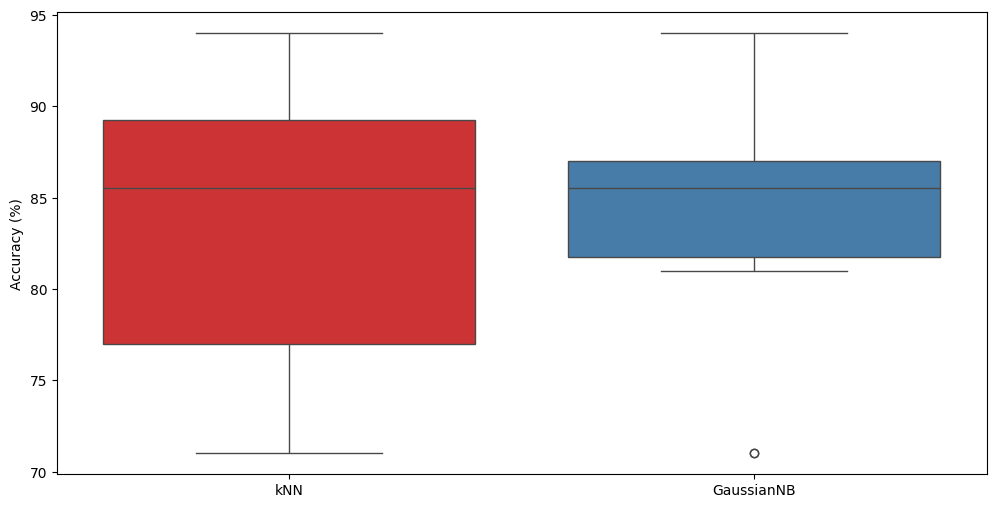

In [4]:
data = {"kNN": [], "GaussianNB": []}

kNN_predictor = KNeighborsClassifier(n_neighbors=5)
Gaussian_predictor = GaussianNB()

kNN_scores = cross_val_score(kNN_predictor, X, y, cv=10, scoring='accuracy')
GaussianNB_scores = cross_val_score(Gaussian_predictor, X, y, cv=10, scoring='accuracy')

for i in range(1, 10 + 1):
    data["kNN"].append(round(kNN_scores[i - 1], 2) * 100)
    data["GaussianNB"].append(round(GaussianNB_scores[i - 1], 2) * 100)
    
df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="Set1")
plt.ylabel("Accuracy (%)")
plt.show()

In [5]:
p_value = ttest_ind(data["kNN"], data["GaussianNB"]).pvalue

p_value

0.9777654248896547

- To assess the difference in accuracy between both predictors we calculate the p-value.

- Since it is extremely high, we reject the hypothesis of kNN being superior to navïve Bayes regarding accuracy.

In [6]:
kNN_predictor1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidian')
kNN_predictor2 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidian')